#   TIME SERIES FORECASTING PROJECT

## Loading data

In [1]:
import pandas as pd

data_sales = pd.read_csv ("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
data_sales.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


## Transform string to datatime

In [2]:
data_sales["date"] = pd.to_datetime(data_sales.date)
data_sales = data_sales.set_index("date")
ts_sales = data_sales["sales"]
ts_sales.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

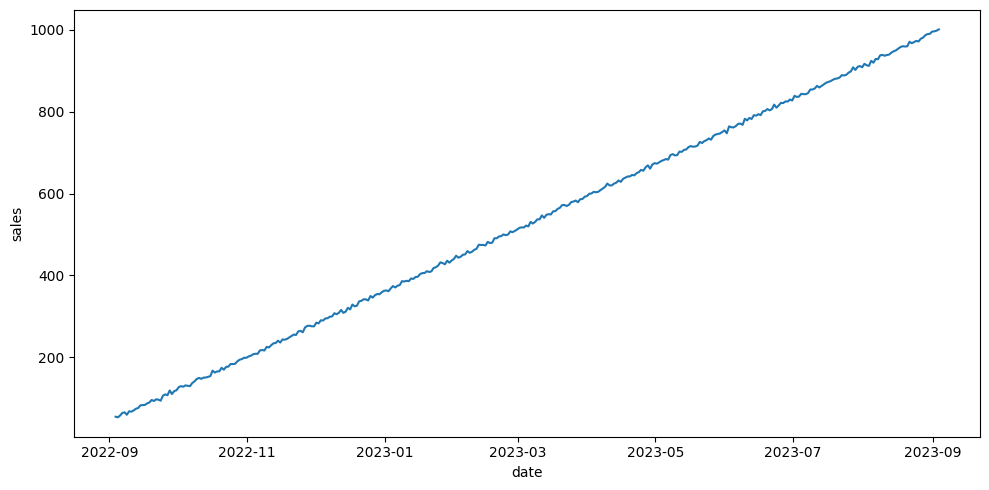

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_sales)

plt.tight_layout()

plt.show()

## Descomposition

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

descomposition = seasonal_decompose (ts_sales, period = 7)
descomposition

### Trend Analysis

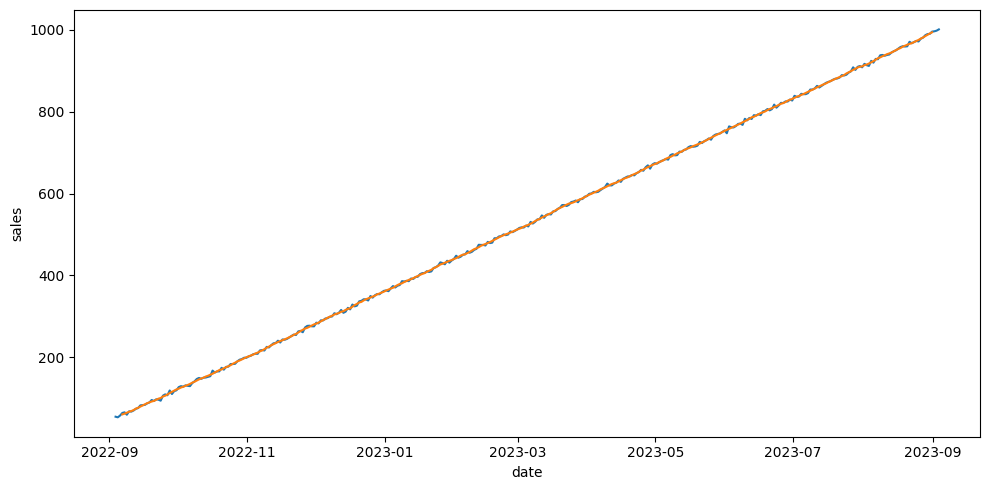

In [5]:
trend = descomposition.trend
fig, axis = plt.subplots (figsize = (10,5))

sns.lineplot (data = ts_sales)
sns.lineplot (data = trend)

plt.tight_layout()
plt.show()

### Seasonality analysis

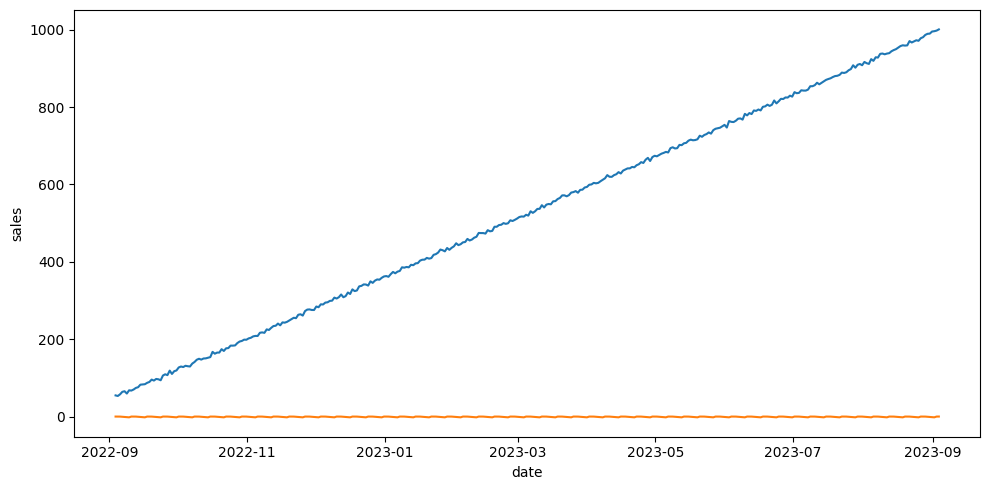

In [6]:
seasonal = descomposition.seasonal

fig, axis = plt.subplots (figsize = (10,5))

sns.lineplot (data = ts_sales)
sns.lineplot (data = seasonal)

plt.tight_layout()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_sales)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

##### p-value es mayor a 0.05 por lo que la serie no es estacionaria

### Analysis of variability

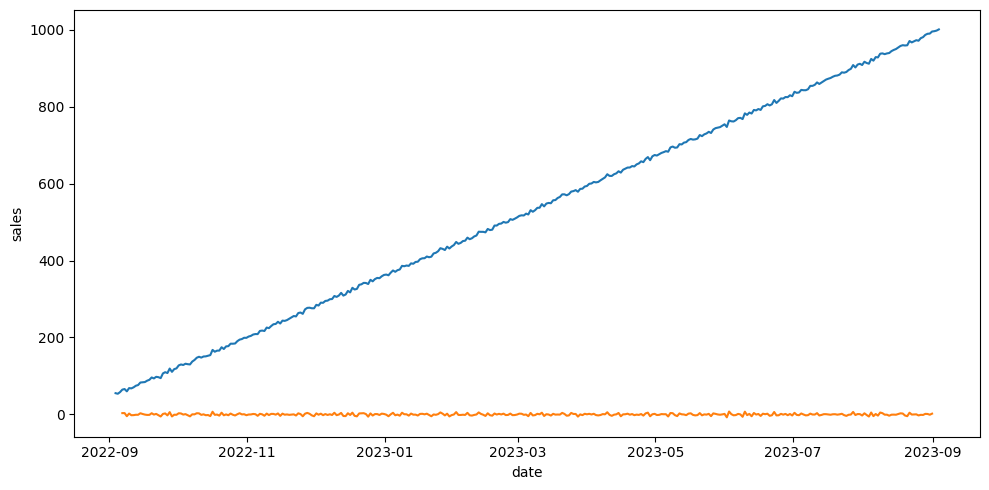

In [8]:
residual = descomposition.resid

fig, axis = plt.subplots (figsize = (10,5))

sns.lineplot (data = ts_sales)
sns.lineplot (data = residual)

plt.tight_layout()
plt.show()

### Autocorrelation analysis

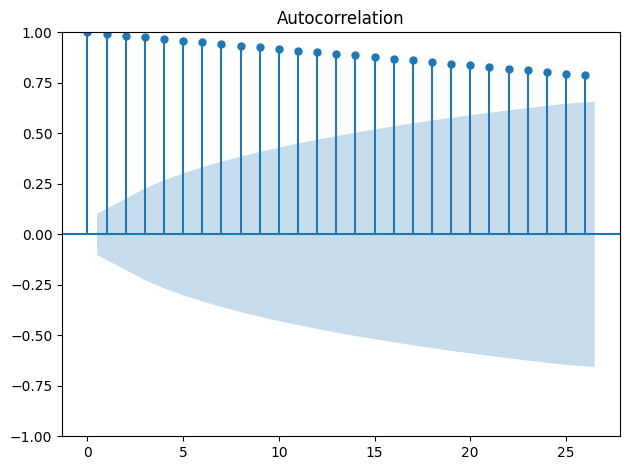

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf (ts_sales)

plt.tight_layout()
plt.show()

### Model training

In [10]:
ts_stationarity = ts_sales.diff().dropna()
test_stationarity (ts_stationarity)

Dickey-Fuller test results:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [13]:
from pmdarima import auto_arima

model = auto_arima (ts_stationarity, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1847.120, Time=1.94 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1972.854, Time=0.26 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2209.657, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1845.127, Time=0.97 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1843.049, Time=0.41 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=1.66 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1843.587, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1841.533, Time=0.35 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1843.434, Time=1.65 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=1.24 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.89 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1839.553, Time=0.19 sec
 ARIMA(1,0,1)(1,0,0)[12] inte

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -915.776
Date:                Sun, 05 May 2024   AIC                           1839.553
Time:                        02:41:19   BIC                           1855.152
Sample:                    09-04-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Model prediction

In [16]:
forecast = model.predict (35)
forecast

2023-09-04 17:10:08.079328    1.675366
2023-09-05 17:10:08.079328    2.673520
2023-09-06 17:10:08.079328    2.591621
2023-09-07 17:10:08.079328    2.598341
2023-09-08 17:10:08.079328    2.597789
2023-09-09 17:10:08.079328    2.597834
2023-09-10 17:10:08.079328    2.597831
2023-09-11 17:10:08.079328    2.597831
2023-09-12 17:10:08.079328    2.597831
2023-09-13 17:10:08.079328    2.597831
2023-09-14 17:10:08.079328    2.597831
2023-09-15 17:10:08.079328    2.597831
2023-09-16 17:10:08.079328    2.597831
2023-09-17 17:10:08.079328    2.597831
2023-09-18 17:10:08.079328    2.597831
2023-09-19 17:10:08.079328    2.597831
2023-09-20 17:10:08.079328    2.597831
2023-09-21 17:10:08.079328    2.597831
2023-09-22 17:10:08.079328    2.597831
2023-09-23 17:10:08.079328    2.597831
2023-09-24 17:10:08.079328    2.597831
2023-09-25 17:10:08.079328    2.597831
2023-09-26 17:10:08.079328    2.597831
2023-09-27 17:10:08.079328    2.597831
2023-09-28 17:10:08.079328    2.597831
2023-09-29 17:10:08.07932

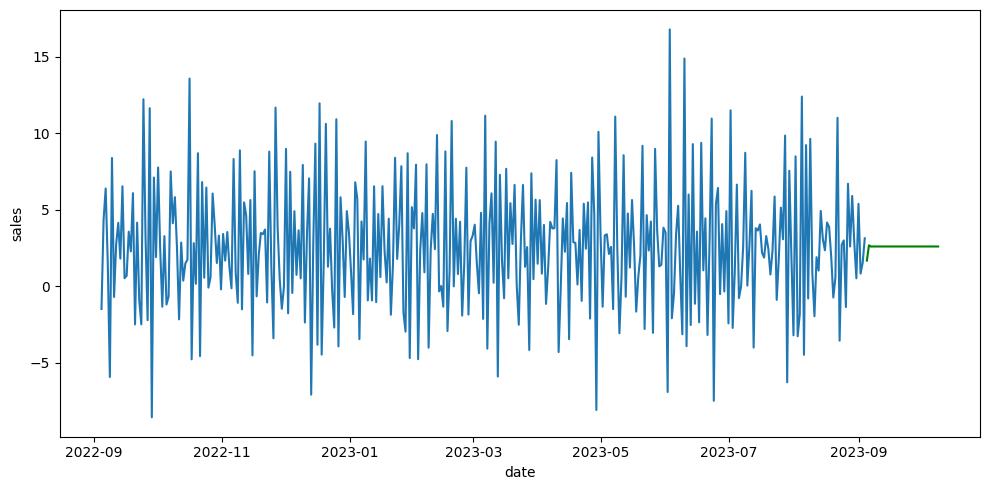

In [17]:
fig, axis = plt.subplots (figsize = (10,5))

sns.lineplot (data = ts_stationarity)
sns.lineplot (data = forecast, c = "green")

plt.tight_layout()
plt.show()

In [18]:
from pickle import dump

dump (model, open ("/workspaces/Time_Series_LeryBenavides/models/forecast_35.sav", "wb"))